# F75 Computer and Data processing 

Experiment carried out by Mathieu Kaltschmidt and Quirinus Schwarzenböck at INF 501 in Heidelberg on the week of February 18th 2019. <br>

__Supervisor:__ Fabrizio Napolitano  <br>

In [1]:
#Useful packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.special import gamma

#Plot settings
plt.style.use('seaborn-talk')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

### Part A: Visualizing and fitting the resonance curves 

In [2]:
#Defining the Lorentz curve
def Lorentzian(omega, A0, omega0, gamma):
    return A0 / np.sqrt((omega0**2 - omega**2)**2 + gamma**2 * omega**2)

#Phase difference 
def phi(omega, omega0, gamma, test, offset):
    return np.arctan((gamma* (omega-test)) / (omega0**2 - (omega-test)**2) ) + offset

#Calculating the residuals
def residual(measured, fitvals, errors):
    residuals = []
    for i in range(len(measured)):
        residuals.append( (measured[i] - fitvals[i]) / errors[i] )
    return np.array(residuals)

### Analyzing the measurement for $\nu_0$

In [176]:
#Loading DATA
amp0, amp0_dev, phase0, phase0_dev, freq0 =  np.loadtxt(r'DATA/PartA/data0.txt', skiprows=1, unpack=True)

#Fitting the Lorentz curve
popt_amp0, pcov_amp0 = curve_fit(Lorentzian, 4*np.pi*freq0[30:97], amp0[30:97], sigma=amp0_dev[30:97])

#Calculating the residuals (omitting other peaks)
res0 = residual(amp0, Lorentzian(4*np.pi*freq0, *popt_amp0), amp0_dev)

res0_corrected = []
freq0_corrected = []

for index in range(len(res0)):
    if np.abs(res0[index]) < 3:
        res0_corrected.append(res0[index])
        freq0_corrected.append(freq0[index])                           
    else:
        pass
                               
res0_corrected = np.array(res0_corrected)
freq0_corrected = np.array(freq0_corrected)                               

In [177]:
#quality of the fit
print('We got the following results for nu0:')
print()

chi_squared0 = np.sum(res0_corrected)
print(r'chi^2 = ', chi_squared0)

dof0 = len(res0_corrected) - 3 
chi_squared0_red = chi_squared0 / dof0
print(r'chi^2_red = ', chi_squared0_red)

prob0 = round(1-chi2.cdf(chi_squared0,dof0),2)*100
print('P = ', prob0, ' %')

We got the following results for nu0:

chi^2 =  22.4142115264
chi^2_red =  0.2219228864
P =  100.0  %


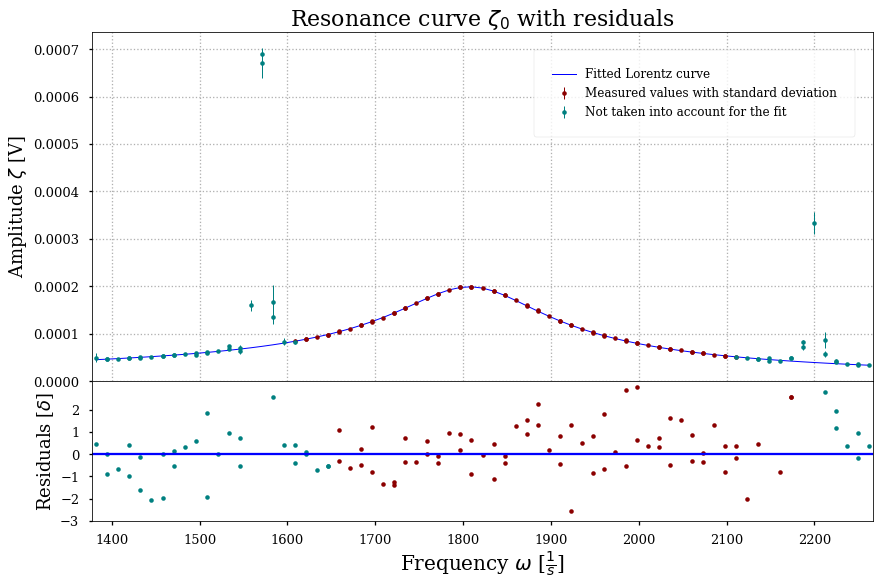

In [141]:
#Plotting the results for the amplitude 
fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw = {'height_ratios':[2.5, 1]})
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].errorbar(4*np.pi*freq0[30:97], amp0[30:97], yerr=amp0_dev[30:97], linewidth=1,linestyle='',marker='.',color='darkred',label='Measured values with standard deviation')
axs[0].errorbar(4*np.pi*freq0[:30], amp0[:30], yerr=amp0_dev[:30], linewidth=1,linestyle='',marker='.',color='teal',label='Not taken into account for the fit')
axs[0].errorbar(4*np.pi*freq0[97:], amp0[97:], yerr=amp0_dev[97:], linewidth=1,linestyle='',marker='.',color='teal')
axs[0].plot(4*np.pi*freq0, Lorentzian(4*np.pi*freq0, *popt_amp0), linewidth = 1, color = 'blue', label  = 'Fitted Lorentz curve')

axs[0].set_title(r"Resonance curve $\zeta_0$ with residuals", size = 22)
axs[0].set_ylabel(r'Amplitude $\zeta$ [V]', size=18)
axs[0].grid(ls='dotted')
axs[0].legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

axs[1].plot(4*np.pi*freq0_corrected[30:97], res0_corrected[30:97], color = 'darkred', linewidth=1, linestyle='',marker='.' )
axs[1].plot(4*np.pi*freq0_corrected[:30], res0_corrected[:30], color = 'teal', linewidth=1, linestyle='',marker='.' )
axs[1].plot(4*np.pi*freq0_corrected[97:], res0_corrected[97:], color = 'teal', linewidth=1, linestyle='',marker='.' )
axs[1].plot(np.linspace(1300,2300,2), np.zeros(2), color = 'blue')

axs[1].set_yticks(np.arange(-3, 3, 1))
axs[1].set_ylabel(r'Residuals [$\delta$]', size=18)
axs[1].set_xlabel(r'Frequency $\omega$ [$\frac{1}{s}$]', size=20)
axs[1].set_xlim(4*np.pi*freq0[0]-5, 4*np.pi*freq0[-1]+5)

#Saving figure
#plt.tight_layout()
plt.savefig('Plots/nu0_amplitude.pdf', format='PDF')
plt.show()

[  9.27981827e+02   9.70749084e+03   1.80719638e+03   1.57102624e+00]


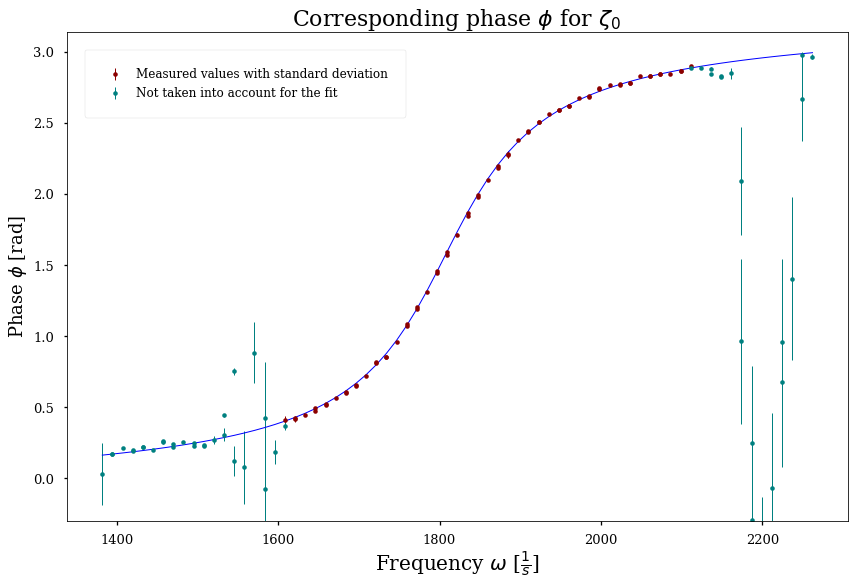

In [6]:
#Analyzing the corresponding phases
popt_ph0, pcov_ph0 = curve_fit(phi, 4*np.pi*freq0[30:97], phase0[30:97], sigma=phase0_dev[30:97], 
                               p0 = [ 175 ,  1812,  0, 0]) 
print(popt_ph0)
#Plotting the result
plt.errorbar(4*np.pi*freq0[30:97], phase0[30:97], yerr=phase0_dev[30:97], linewidth=1,linestyle='',marker='.',color='darkred',label='Measured values with standard deviation')
plt.errorbar(4*np.pi*freq0[:30], phase0[:30], yerr=phase0_dev[:30], linewidth=1,linestyle='',marker='.',color='teal',label='Not taken into account for the fit')
plt.errorbar(4*np.pi*freq0[97:], phase0[97:], yerr=phase0_dev[97:], linewidth=1,linestyle='',marker='.',color='teal')
plt.plot(4*np.pi*freq0, phi(4*np.pi*freq0, *popt_ph0), linewidth = 1, color = 'blue')


plt.title(r"Corresponding phase $\phi$ for $\zeta_0$ ", size = 22)
plt.xlabel(r'Frequency $\omega$ [$\frac{1}{s}$]', size=20)
plt.ylabel(r'Phase $\phi$ [rad]', size=18)
plt.ylim(-0.3, 1*np.pi)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Saving figure
#plt.tight_layout()
plt.savefig('Plots/nu0_phase.pdf', format='PDF')
plt.show()

### Analyzing the measurement for $\nu_1$

In [158]:
#Loading DATA
amp1, amp1_dev, phase1, phase1_dev, freq1 =  np.loadtxt(r'DATA/PartA/data1.txt', skiprows=1, unpack=True)

#Fitting the Lorentz curve
popt_amp1, pcov_amp1 = curve_fit(Lorentzian, 2*freq1[88:163], amp1[88:163], sigma=amp1_dev[88:163])

#Calculating the residuals (omitting other peaks)
res1 = residual(amp1, Lorentzian(2*freq1, *popt_amp1), amp1_dev)
res1_corrected = []
freq1_corrected = []

for index in range(len(res1)):
    if np.abs(res1[index]) < 10.35:
        res1_corrected.append(res1[index])
        freq1_corrected.append(freq1[index])                           
    else:
        pass
                               
res1_corrected = np.array(res1_corrected)
freq1_corrected = np.array(freq1_corrected)                               

In [159]:
#quality of the fit
print('We got the following results for nu1:')
print()

chi_squared1 = np.sum(res1_corrected)
print(r'chi^2 = ', chi_squared1)

dof1 = len(res1_corrected) - 3 
chi_squared1_red = chi_squared1 / dof1
print(r'chi^2_red = ', chi_squared1_red)

prob1 = round(1-chi2.cdf(chi_squared1,dof1),2)*100
print('P = ', prob1, ' %')

We got the following results for nu1:

chi^2 =  224.677631182
chi^2_red =  1.02592525654
P =  38.0  %


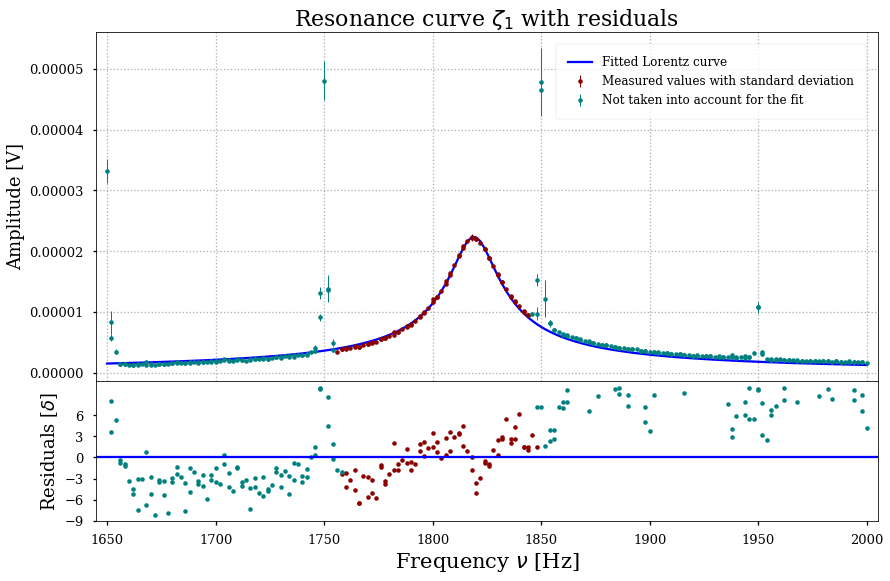

In [9]:
#Plotting the results for the amplitude 
fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw = {'height_ratios':[2.5, 1]})
fig.subplots_adjust(hspace=0)


# Plot each graph, and manually set the y tick values
axs[0].errorbar(2*freq1[88:163], amp1[88:163], yerr=amp1_dev[88:163], linewidth=1,linestyle='',marker='.',color='darkred', label='Measured values with standard deviation')
axs[0].errorbar(2*freq1[:88], amp1[:88], yerr=amp1_dev[:88], linewidth=1,linestyle='',marker='.',color='teal', label='Not taken into account for the fit')
axs[0].errorbar(2*freq1[163:], amp1[163:], yerr=amp1_dev[163:], linewidth=1,linestyle='',marker='.',color='teal')
axs[0].plot(2*freq1, Lorentzian(2*freq1, *popt_amp1), color = 'blue', label  = 'Fitted Lorentz curve')

axs[0].set_title(r"Resonance curve $\zeta_1$ with residuals", size = 22)
axs[0].set_ylabel(r'Amplitude [V]', size=18)
axs[0].grid(ls='dotted')
axs[0].legend(frameon=True,fontsize='large', borderpad=1, borderaxespad=1,loc='upper right')

axs[1].plot(2*freq1_corrected[88:163], res1_corrected[88:163], color = 'darkred', linewidth=1,linestyle='',marker='.' )
axs[1].plot(2*freq1_corrected[:88], res1_corrected[:88], color = 'teal', linewidth=1,linestyle='',marker='.' )
axs[1].plot(2*freq1_corrected[163:], res1_corrected[163:], color = 'teal', linewidth=1,linestyle='',marker='.' )
axs[1].plot(np.linspace(2*freq1[0]-5, 2*freq1[-1]+5,2), np.zeros(2), color = 'blue')

axs[1].set_yticks(np.arange(-9, 9, 3))
axs[1].set_ylabel(r'Residuals [$\delta$]', size=18)
axs[1].set_xlabel(r'Frequency $\nu$ [Hz]', size=21)
axs[1].set_xlim(2*freq1[0]-5, 2*freq1[-1]+5)

#Saving figure
#plt.tight_layout()
plt.savefig('Plots/nu1_amplitude.pdf', format='PDF')
plt.show()

[  4.70761224e+02   2.98462290e+03   1.14229461e+04   1.40341465e+00]


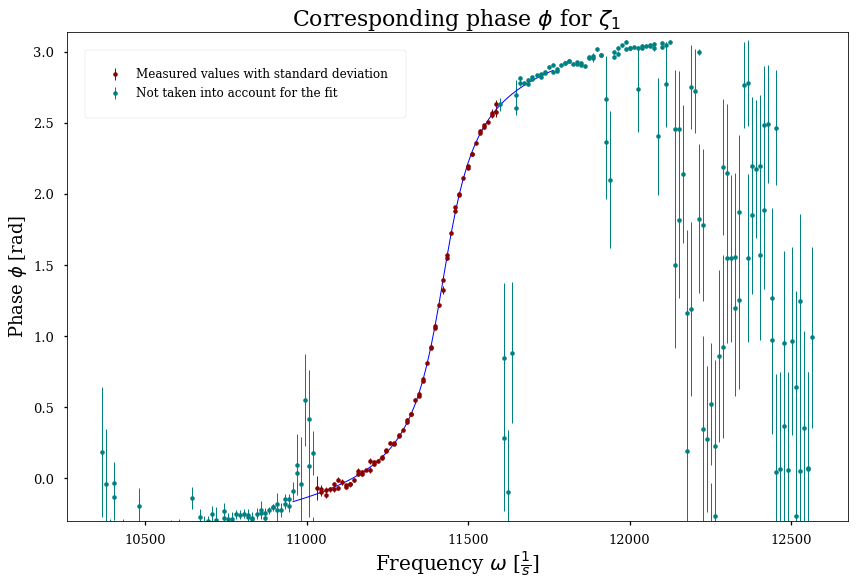

In [237]:
#Analyzing the corresponding phases
popt_ph1, pcov_ph1 = curve_fit(phi, 4*np.pi*freq1[88:163], phase1[88:163], sigma=phase1_dev[88:163], 
                               p0 = [ 1000 ,  11350,  0, 0]) 
print(popt_ph1)
#Plotting the result
plt.errorbar(4*np.pi*freq1[88:163], phase1[88:163], yerr=phase1_dev[88:163], linewidth=1,linestyle='',marker='.',color='darkred',label='Measured values with standard deviation')
plt.errorbar(4*np.pi*freq1[:88], phase1[:88], yerr=phase1_dev[:88], linewidth=1,linestyle='',marker='.',color='teal',label='Not taken into account for the fit')
plt.errorbar(4*np.pi*freq1[163:], phase1[163:], yerr=phase1_dev[163:], linewidth=1,linestyle='',marker='.',color='teal')
plt.plot(4*np.pi*freq1[78:185], phi(4*np.pi*freq1[78:185], *popt_ph1), linewidth = 1, color = 'blue')


plt.title(r"Corresponding phase $\phi$ for $\zeta_1$ ", size = 22)
plt.xlabel(r'Frequency $\omega$ [$\frac{1}{s}$]', size=20)
plt.ylabel(r'Phase $\phi$ [rad]', size=18)
plt.ylim(-0.3, 1*np.pi)

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Saving figure
#plt.tight_layout()
plt.savefig('Plots/nu1_phase.pdf', format='PDF')
plt.show()

### Analyzing the measurement for $\nu_2$

In [180]:
#Background correction
def Lorentzian_Corr(w,A,w0,gamma,B,omega,phi):
    return A/(np.sqrt((w0**2-w**2)**2+(gamma*w)**2)) + B*np.cos(omega*w + phi)

params = [1.14044667e+00,   5.11974119e+03,  -4.55475529e+01,  1e-9, 0.03, 0]

#Loading DATA
amp2, amp2_dev, phase2, phase2_dev, freq2 =  np.loadtxt(r'DATA/PartA/data2.txt', skiprows=1, unpack=True)

#Fitting the corrected Lorentz curve
popt_amp2, pcov_amp2 = curve_fit(Lorentzian_Corr, 2*freq2[150:220], amp2[150:220], sigma = amp2_dev[150:220], p0 = params)


#Calculating the residuals (omitting other peaks)
res2 = residual(amp2, Lorentzian_Corr(2*freq2, *popt_amp2), amp2_dev)

res2_corrected = []
freq2_corrected2 = []

for index in range(len(res2)):
    if np.abs(res2[index]) < 6:
        res2_corrected.append(res2[index])
        freq2_corrected2.append(freq2[index])                           
    else:
        pass
                               
res2_corrected = np.array(res2_corrected)
freq2_corrected2 = np.array(freq2_corrected2) 

print(len(res2))
print(len(res2_corrected))

376
162


In [181]:
#quality of the fit
print('We got the following results for nu2:')
print()

chi_squared2 = np.sum(res2_corrected)
print(r'chi^2 = ', chi_squared2)

dof2 = len(res2_corrected) - 3 
chi_squared2_red = chi_squared2 / dof2
print(r'chi^2_red = ', chi_squared2_red)

prob2 = round(1-chi2.cdf(chi_squared2,dof2),2)*100
print('P = ', prob2, ' %')

We got the following results for nu2:

chi^2 =  -58.2215033384
chi^2_red =  -0.366172976971
P =  100.0  %


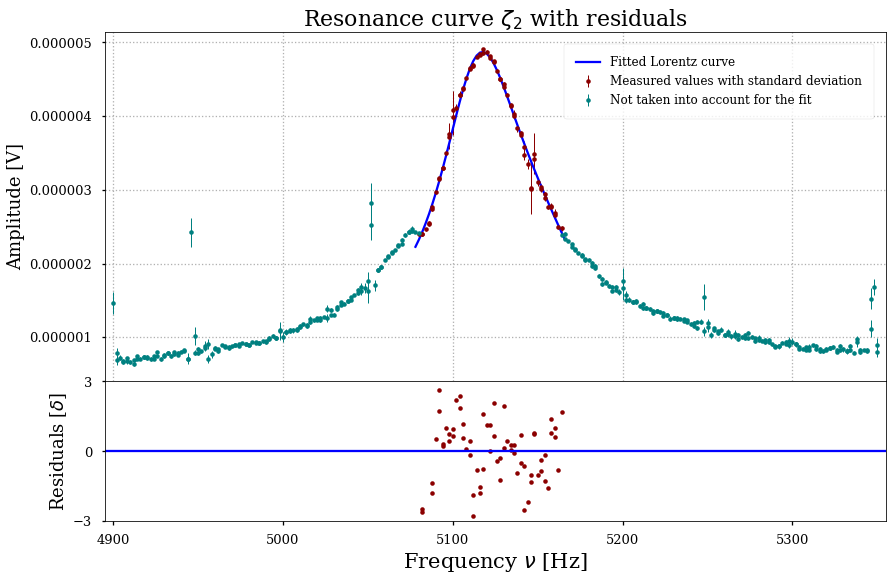

In [200]:
#Plotting the results for the amplitude 
fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw = {'height_ratios':[2.5, 1]})
fig.subplots_adjust(hspace=0)


# Plot each graph, and manually set the y tick values
axs[0].errorbar(2*freq2[150:220], amp2[150:220], yerr=amp2_dev[150:220], linewidth=1,linestyle='',marker='.',color='darkred', label='Measured values with standard deviation')
axs[0].errorbar(2*freq2[:150], amp2[:150], yerr=amp2_dev[:150], linewidth=1,linestyle='',marker='.',color='teal', label='Not taken into account for the fit')
axs[0].errorbar(2*freq2[220:], amp2[220:], yerr=amp2_dev[220:], linewidth=1,linestyle='',marker='.',color='teal')
axs[0].plot(2*np.array(freq2[148:222]), Lorentzian_Corr(2*np.array(freq2[148:222]), *popt_amp2), color = 'blue', label  = 'Fitted Lorentz curve')

axs[0].set_title(r"Resonance curve $\zeta_2$ with residuals", size = 22)
axs[0].set_ylabel(r'Amplitude [V]', size=18)
axs[0].grid(ls='dotted')
axs[0].legend(frameon=True,fontsize='large', borderpad=1, borderaxespad=1,loc='upper right')

axs[1].plot(2*freq2[150:220], res2[150:220], color = 'darkred', linewidth=1, linestyle='',marker='.' )
axs[1].plot(np.linspace(2*freq2[0]-5, 2*freq2[-1]+5,2), np.zeros(2), color = 'blue')

axs[1].set_yticks(np.arange(-9, 9, 3))
axs[1].set_ylabel(r'Residuals [$\delta$]', size=18)
axs[1].set_xlabel(r'Frequency $\nu$ [Hz]', size=21)
axs[1].set_xlim(2*freq2[0]-5, 2*freq2[-1]+5)
axs[1].set_ylim(-3, 3)



#Saving figure
#plt.tight_layout()
plt.savefig('Plots/nu2_amplitude.pdf', format='PDF')
plt.show()

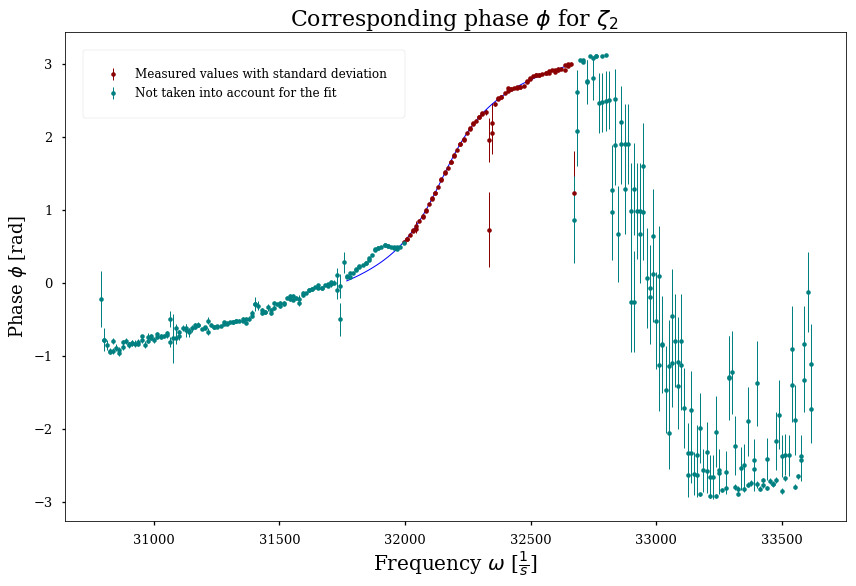

In [300]:
#Analyzing the corresponding phases
popt_ph2, pcov_ph2 = curve_fit(phi, 4*np.pi*freq2[160:250], phase2[160:250], sigma=phase2_dev[160:250], p0 = [5.18827421e+02,   1.88955987e+03,   3.21467897e+04,   1.41960433e+00]) 
#Plotting the result
plt.errorbar(4*np.pi*freq2[160:250], phase2[160:250], yerr=phase2_dev[160:250], linewidth=1,linestyle='',marker='.',color='darkred',label='Measured values with standard deviation')
plt.errorbar(4*np.pi*freq2[:160], phase2[:160], yerr=phase2_dev[:160], linewidth=1,linestyle='',marker='.',color='teal',label='Not taken into account for the fit')
plt.errorbar(4*np.pi*freq2[250:], phase2[250:], yerr=phase2_dev[250:], linewidth=1,linestyle='',marker='.',color='teal')
plt.plot(4*np.pi*freq2[130:245], phi(4*np.pi*freq2[130:245], *popt_ph2), linewidth = 1, color = 'blue')


plt.title(r"Corresponding phase $\phi$ for $\zeta_2$ ", size = 22)
plt.xlabel(r'Frequency $\omega$ [$\frac{1}{s}$]', size=20)
plt.ylabel(r'Phase $\phi$ [rad]', size=18)
#plt.xlim(31750, 32680)
#plt.ylim(-0.5, 3.5)

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Saving figure
#plt.tight_layout()
plt.savefig('Plots/nu2_phase.pdf', format='PDF')
plt.show()

### Part B: Temperature dependency of the resonance frequency

We measured the resonance curve for $\nu_0$ for eleven different (increasing) temperatures. Iteratively we are using the same fit function as in part A to obtain the fit value of $\omega_{\text{res}}$. Then we plot the values we obtained as a function of a temperature to find the (hopefully linear) relationship between $\omega_{\text{res}}$ and $T$.

In [4]:
#Loading data, fitting the Lorentzian and extracting omega0 for all eleven temperature measurements
omega_res = []

for N in range(1,12):
    temp, temp_dev, amp, amp_dev, phase, phase_dev, freq = np.loadtxt(r'DATA/PartB/T{}.txt'.format(N), skiprows=1, unpack=True)
    #fitting data (already determined optimal fit range) 
    popt, pcov = curve_fit(Lorentzian, 4*np.pi*freq[42:98], amp[42:98], sigma=amp_dev[42:98])
    #appending 4-tuple with temp, temp_dev, omega_res, omega_res_dev
    omega_res.append((temp[0], temp_dev[0], popt[1], np.sqrt(pcov[1][1])))    

In [5]:
#Linear fit of the resulting dependency
def linear(T, m, y0):
    return m*T + y0

#Fitting all the measured points
popt_lin, pcov_lin = curve_fit(linear, [omega_res[i][0] for i in range(11)], 
                               [omega_res[i][2] for i in range(11)], sigma=[omega_res[i][1] for i in range(11)])

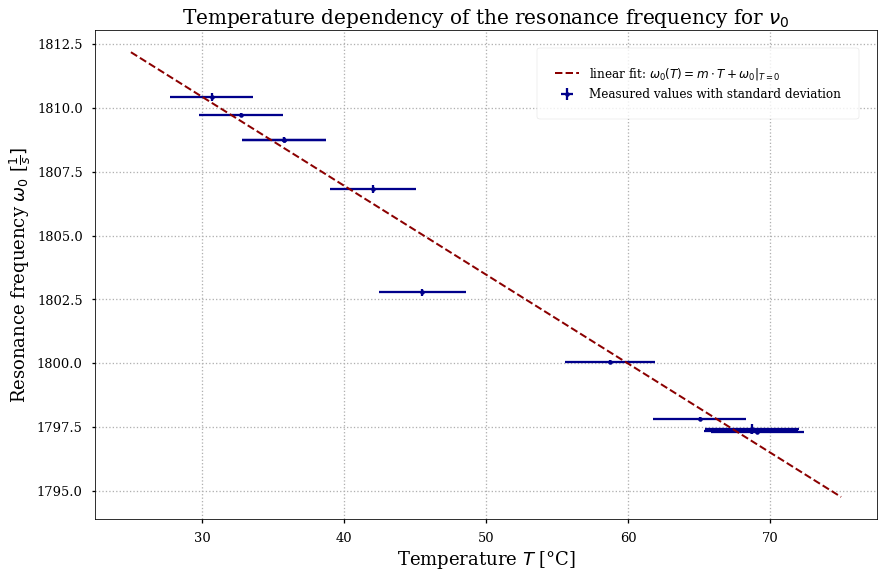

In [6]:
#Plotting the result 
plt.errorbar([omega_res[i][0] for i in range(11)], [omega_res[i][2] for i in range(11)],
              xerr = [omega_res[i][1] for i in range(11)], yerr = [omega_res[i][3] for i in range(11)],
              linestyle ='', marker='.',color='darkblue', label='Measured values with standard deviation')
plt.plot(np.linspace(25,75,2), linear(np.linspace(25,75,2), *popt_lin), linestyle = '--', lw = 2 ,color = 'darkred',
         label = r'linear fit: $\omega_0(T) = m\cdot T + \omega_0|_{T=0}$ ')

plt.title(r'Temperature dependency of the resonance frequency for $\nu_0$', size = 20)
plt.xlabel(r'Temperature $T$ [°C]', size = 18)
plt.ylabel(r'Resonance frequency $\omega_0$ [$\frac{1}{s}]$', size = 18)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
plt.grid(ls='dotted')

plt.savefig('Plots/temp_dep.pdf', format='PDF')
plt.show()